# LSTM - Long Short Term Memory Networks
Las redes LSTM son un tipo de red neuronal recurrente (RNN) con capacidad de retener y utilizar información a largo plazo. Mediante el uso de unidades de momoria especializadas, las LSTM son capaces de manejar dependencias a largo plazo en secuencias de datos y evitar el desvanecimiento del gradiente, problema que podía ocasionar que las RNN simples olvidaran información relevante en secuencias largas. 

Además, ... escribir algo de los pesos

![LSTM.png](LSTM.png)

In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Cargar los datos y dividirlos en training y validation
Se cargan los datos preprocesados y se dividen en dos conjuntos: training y validation.

In [3]:
df = pd.read_csv('data/goemotions_clean.csv')
df.head()

,text,emotion
0,Shhh dont give idea,anger
1,Thank much kind stranger I really need,gratitude
2,Ion know would better buy trim make hard dose,neutral
3,Im honestly surprised We fallen much farther,excitement
4,Jurisprudence fetishist get technicality,neutral


In [4]:
# Dividir el dataset en train y validation
X_train, X_val, y_train, y_val = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=0)

## Preprocesamiento de los datos
Para poder utilizar los datos en la red neuronal, es necesario preprocesarlos. El texto debe ser convertido a números, ya que las redes neuronales no pueden trabajar con texto. Para ello, se utiliza la clase Tokenizer de Keras, que convierte el texto a secuencias de números. Además, se añade padding a las secuencias para que todas tengan la misma longitud.

### Tokenizer

In [5]:
## Tokenizar el texto
max_words = 1000 # Número máximo de palabras a considerar en el vocabulario (las más frecuentes), el resto se consideran desconocidas

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

In [6]:
# Vocabulario
word_index = tokenizer.word_index
print(f'Se encontraron {len(word_index)} tokens únicos.')

Se encontraron 27545 tokens únicos.


In [7]:
# Convertir los textos a secuencias de números
train_sequences = tokenizer.texts_to_sequences(X_train)
val_sequences = tokenizer.texts_to_sequences(X_val)

In [8]:
# Convertir output a números
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

### Padding

In [9]:
# Comprobar la longitud de las secuencias
max_seq_len = max([len(seq) for seq in train_sequences])
print(f'La secuencia más larga tiene {max_seq_len} tokens.')

La secuencia más larga tiene 18 tokens.


In [10]:
# Padding para que todas las secuencias tengan la misma longitud (agregar ceros al final de la secuencia para ajustarla al tamaño máximo)
X_train_padded = pad_sequences(train_sequences, maxlen=max_seq_len)
X_val_padded = pad_sequences(val_sequences, maxlen=max_seq_len)

In [11]:
# Muestra de algunas secuencias para comprobar que todas tienen la misma longitud
for seq in X_train_padded[:5]:
    print(seq)

[  0   0   0   0   0   0   0   0   0   0   0  29 655  19 140  46 409 256]
[  0   0   0   0   0   0   0 545 663  40  28 180 147 164  31 666 321 522]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  33 683]
[  0   0   0   0   0   0   0   0  49 632   1 807   2  59  35   2  88 960]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  17 120  58]


## Modelo de la red neuronal LSTM

In [12]:
# Número de clases (emociones diferentes)
num_classes = len(df['emotion'].unique())
print(f'Número de clases (emociones): {num_classes}')

Número de clases (emociones): 23


In [17]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_seq_len)) # Capa de Embedding
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax')) # activation = num_classes, activation='softmax')) # Capa de salida con una neurona por cada clase y función de activación softmax para obtener probabilidades

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Entrena el modelo
batch_size = 32 # número de muestras que se usarán en cada iteración
epochs = 10 # número de iteraciones completas al conjunto de datos de entrenamiento
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_padded, y_val))

Epoch 1/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.2952 - loss: 2.5986 - val_accuracy: 0.3334 - val_loss: 2.3218
Epoch 2/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3402 - loss: 2.2769 - val_accuracy: 0.3333 - val_loss: 2.2898
Epoch 3/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3426 - loss: 2.2163 - val_accuracy: 0.3342 - val_loss: 2.2920
Epoch 4/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3493 - loss: 2.1879 - val_accuracy: 0.3327 - val_loss: 2.2927
Epoch 5/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3492 - loss: 2.1572 - val_accuracy: 0.3310 - val_loss: 2.3027
Epoch 6/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3536 - loss: 2.1343 - val_accuracy: 0.3200 - val_loss: 2.3182
Epoch 7/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3580 - loss: 2.1061 - val_accuracy: 0.3150 - val_loss: 2.3399
Epoch 8/10
2691/2691 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.3574 - loss: 

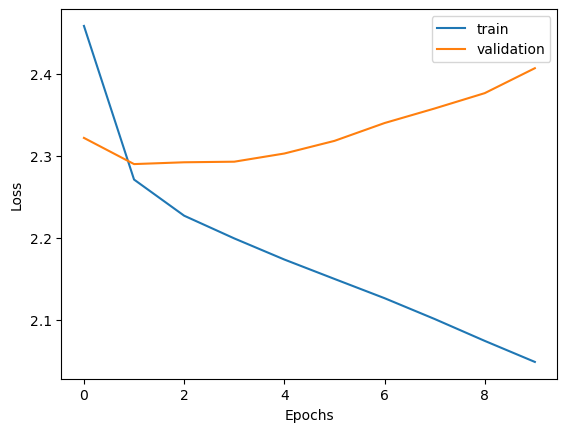

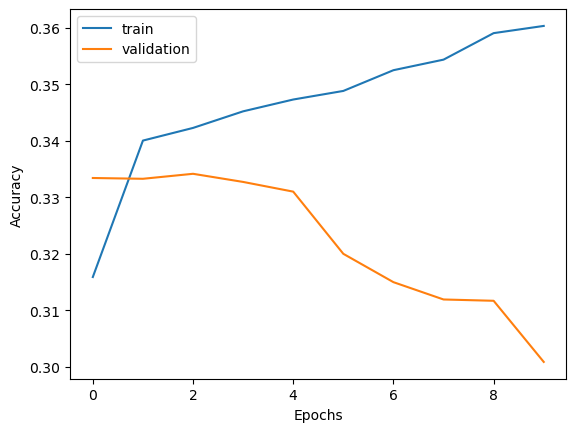

In [19]:
# Mostrar pérdida y precisión en el conjunto de entrenamiento y validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()